In [1]:
import torch 
import torchvision
from torchvision.models.detection.keypoint_rcnn import keypointrcnn_resnet50_fpn
from torchvision import transforms
import skimage
from skimage import io, transform
from matplotlib import pyplot as plt
import numpy as np

In [2]:
model_mask = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model_keypoint = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model_keypoint.eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )


In [3]:
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

NameError: name 'model' is not defined

In [ ]:
image = io.imread("./swimmer5.jpg")
image_tensor = transforms.ToTensor()(image)
#Normalized internally
#image_tensor = transforms.Normalize(mean = [0.43216, 0.394666, 0.37645],std = [0.22803, 0.22145, 0.216989])(image_tensor)

In [ ]:
prediction = model_keypoint([image_tensor])

In [ ]:
print(prediction)

In [ ]:
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']
keypoints = prediction[0]['keypoints']
plt.figure()
# show image
plt.imshow(image_tensor.permute(1,2,0).detach().numpy())
max_score = 0
max_box = []
for idx, box in enumerate(boxes):
    if scores[idx].item() > max_score:
        print(labels[idx].data.numpy())
        max_score = scores[idx].item()
        max_box = box
        max_keypoints = keypoints[idx] 
print(max_score)
#for box in boxes[np.where(scores > .80)]:
for box in [max_box]:
    # add keypoints to imag
        # TODO: add color coding for different body parts
        
        # draw lines as specified in skeleton 
    
    plt.plot([box[0], box[2]], [box[1], box[1]], c='r')
    plt.plot([box[0], box[2]], [box[3], box[3]], c='r')
    plt.plot([box[0], box[0]], [box[1], box[3]], c='r')
    plt.plot([box[2], box[2]], [box[1], box[3]], c='r')
    for keypoint in max_keypoints[5:]:
         plt.scatter(np.array(max_keypoints.detach().numpy())[:,0],np.array(max_keypoints.detach().numpy())[:,1], s=10, marker='.', c='r')\

        # pause a bit so that plots are updated
plt.pause(0.001)  
        
        # display
plt.show(block=True)

# Custom Anchor generator

In [ ]:
from torchvision.models.detection.keypoint_rcnn import KeypointRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision.models.detection.rpn import AnchorGenerator, RPNHead, RegionProposalNetwork
from torchvision.models.utils import load_state_dict_from_url

In [ ]:
 backbone = resnet_fpn_backbone('resnet50', True)

In [ ]:
#anchor generator
anchor_sizes = ((32,), (64,), (128,), (256,), (512,))
aspect_ratios = ((0.1, 0.2, 0.3),) * len(anchor_sizes)
rpn_anchor_generator = AnchorGenerator(anchor_sizes, aspect_ratios)
            

In [ ]:
model_custom_anchor = KeypointRCNN(backbone, num_classes=2, rpn_anchor_generator=rpn_anchor_generator, num_keypoints=17)

In [ ]:
# weights
model_url = 'https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth'
state_dict = load_state_dict_from_url(model_url, progress=True)
model_custom_anchor.load_state_dict(state_dict)
model_custom_anchor.eval()

1
0.5484210848808289


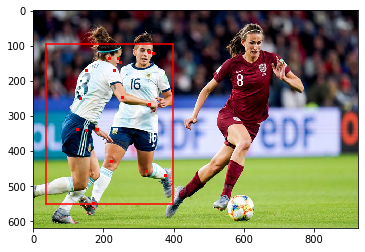

In [13]:
image = io.imread("./football.jpg")
image_tensor = transforms.ToTensor()(image)
prediction = model_custom_anchor([image_tensor])
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']
keypoints = prediction[0]['keypoints']
plt.figure()
# show image
plt.imshow(image_tensor.permute(1,2,0).detach().numpy())
max_score = 0
max_box = []
for idx, box in enumerate(boxes):
    if scores[idx].item() > max_score:
        print(labels[idx].data.numpy())
        max_score = scores[idx].item()
        max_box = box
        max_keypoints = keypoints[idx] 
print(max_score)
#for box in boxes[np.where(scores > .80)]:
for box in [max_box]:
    # add keypoints to imag
        # TODO: add color coding for different body parts
        
        # draw lines as specified in skeleton 
    
    plt.plot([box[0], box[2]], [box[1], box[1]], c='r')
    plt.plot([box[0], box[2]], [box[3], box[3]], c='r')
    plt.plot([box[0], box[0]], [box[1], box[3]], c='r')
    plt.plot([box[2], box[2]], [box[1], box[3]], c='r')
    for keypoint in max_keypoints[5:]:
         plt.scatter(np.array(max_keypoints.detach().numpy())[:,0],np.array(max_keypoints.detach().numpy())[:,1], s=10, marker='.', c='r')\

        # pause a bit so that plots are updated
plt.pause(0.001)  
        
        # display
plt.show(block=True)